# E-Commerce Business Insights and Recommendations
The goal of this project is to gain an understanding of a business by exploring its dataset, identify business questions to answer, and uncover actionable insights using SQL and Python. The insights gathered will be used to develop dashboards and visualisations in PowerBI that can help the business make informed decisions and create value.

## Dataset
For this project, I will be using the Fictitious E-Commerce Dataset ["thelook_ecommerce"](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=thelook_ecommerce&page=dataset&project=fiery-nimbus-360723) from Google BigQuery. This dataset contains detailed information about:
* `distribution_centers`,
* `events`,
* `inventory_items`,
* `order_items`,
* `orders`,
* `products`,
* `users`

The dataset has been collected from a large online retailer and represents a real-life scenario for a retail business. With a large number of tables and a large volume of data, this dataset provides a good representation of a typical retail business and offers a great opportunity to apply a variety of data analysis techniques to uncover insights.

## Tasks
1. **Data Exploration:**
* Familiarise with the e-commerce dataset, including tables and columns.
* Identify business questions that can be answered to uncover actionable insights and create value for the business.

2. **Data Cleaning and Transformation:**
* Identify and extract relevant tables to analyse for business recommendations.
* Check for missing values, duplicates.

3. **Data Analysis and Visualisation:**
* Visualise the distributions and summary statistics
* Remove any outliers
* Calculate key performance indicators (KPIs) that measure the success of the business.

4. **Statistical Analysis:**
* Conduct hypothesis tests to determine if there are significant differences between groups.
* Identify major drivers of the e-commerce KPIs.

5. **KMeans Clustering:**
* Use the KMeans machine learning technique to segment customers into different groups and understand their behavior and preferences.

6. **Provide recommendations:**
* Provide recommendations based on the results from the data analysis, hypothesis testing, KPI calculation, and KMeans clustering.
* Use Power BI to create a dashboard to display the results of your analysis.

## Packages

In [255]:
# Data processing
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
# BigQuery API
from google.cloud import bigquery 
import pandas_gbq
import os

# Statistics
from scipy import stats

# Create BigQuery client
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'bq_service.json'
client = bigquery.Client()

# Data Exploration
I need to have an overview of the tables in the dataset to gain an understanding of the business, which can allow me to plan on how to create value for the business by uncovering new opportunities and areas for improvement.

### Schema

In [183]:
q = """
select 
    table_name, 
    column_name,
    data_type
from bigquery-public-data.thelook_ecommerce.INFORMATION_SCHEMA.COLUMNS
"""

schema_df = pd.read_gbq(q)
schema_df

,table_name,column_name,data_type
0,users,id,INT64
1,users,first_name,STRING
2,users,last_name,STRING
3,users,email,STRING
4,users,age,INT64
...,...,...,...
68,events,postal_code,STRING
69,events,browser,STRING
70,events,traffic_source,STRING
71,events,uri,STRING


In [184]:
# View total number of rows
q = """
SELECT 
    table_id,
    row_count
FROM bigquery-public-data.thelook_ecommerce.__TABLES__
"""

pd.read_gbq(q)

,table_id,row_count
0,distribution_centers,10
1,events,2426900
2,inventory_items,490744
3,order_items,181521
4,orders,125144
5,products,29120
6,users,100000


In [185]:
# Preview and understand each table
q = """
select *
from bigquery-public-data.thelook_ecommerce.users
limit 5;
"""
pd.read_gbq(q)

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,67498,Tyler,Morrison,tylermorrison@example.net,20,M,Mie,58734 Wong Ranch,513-0836,Suzuka City,Japan,34.851814,136.508713,Search,2022-12-18 01:30:00+00:00
1,78040,Robert,Perkins,robertperkins@example.net,18,M,Mie,40674 Delgado Walk,513-0836,Suzuka City,Japan,34.851814,136.508713,Email,2021-05-14 03:59:00+00:00
2,1983,Timothy,Hensley,timothyhensley@example.com,20,M,Acre,65955 Scott Isle Suite 340,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Display,2020-07-20 03:46:00+00:00
3,12782,Christopher,Gray,christophergray@example.net,39,M,Acre,36368 Wilson Forest,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2022-06-23 08:41:00+00:00
4,20440,Cynthia,Webb,cynthiawebb@example.org,57,F,Acre,34648 Mccarthy Mission,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Organic,2021-03-24 09:31:00+00:00


## Sales trend over time
* Tables: `orders`, `order_items`

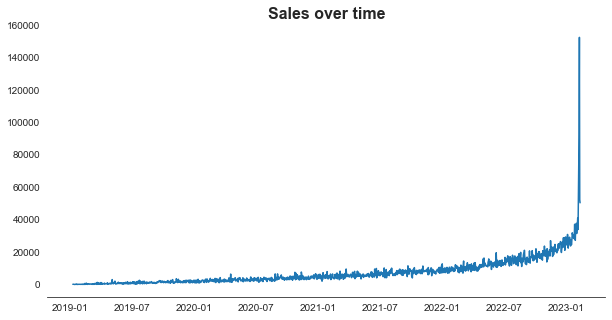

In [254]:
q = """
select
    date(o.created_at) as date,
    sum(o.num_of_item * oi.sale_price) as total_sales
from bigquery-public-data.thelook_ecommerce.orders as o
join bigquery-public-data.thelook_ecommerce.order_items as oi
on o.order_id = oi.id

group by date
order by date;
"""

df = pd.read_gbq(q)

plt.title('Sales over time')
plt.plot(df.date, df.total_sales);

## Revenue streams
Tables: `order_items`, `products`, `orders`, `users`

In [245]:
sns.set_style("white", {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False})

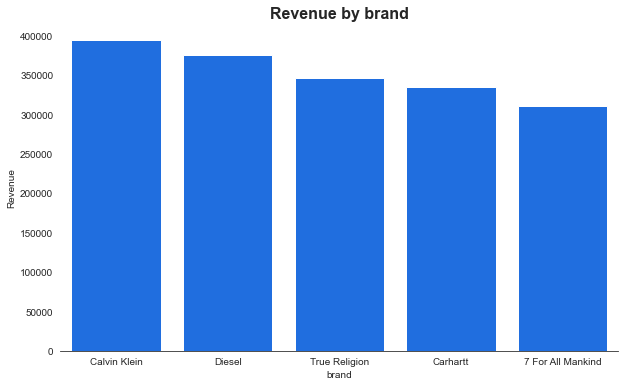

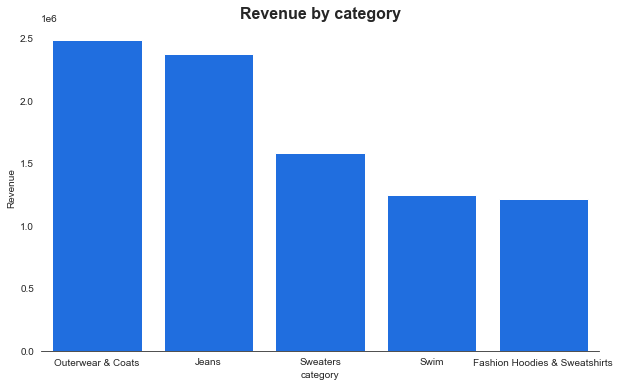

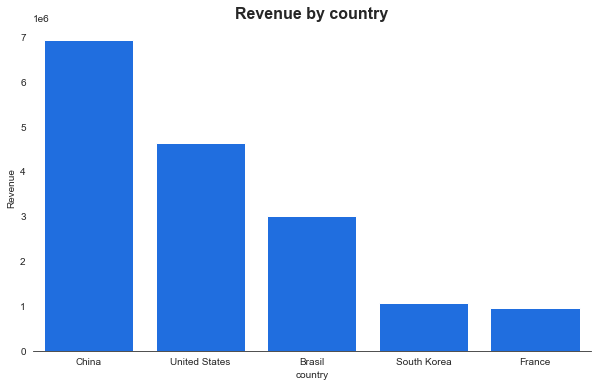

In [258]:
# Revenue Streams
rev_streams = ['brand', 'category', 'country']

for stream in rev_streams:
    q = """
    select
        {},
        sum(sale_price * num_of_item) as total_revenue

    from bigquery-public-data.thelook_ecommerce.order_items as oi
    join bigquery-public-data.thelook_ecommerce.products as p
    on oi.product_id = p.id
    join bigquery-public-data.thelook_ecommerce.orders as o
    on o.order_id = oi.order_id
    join bigquery-public-data.thelook_ecommerce.users as u
    on oi.user_id = u.id

    group by {}

    order by total_revenue desc
    limit 5
    """.format(stream, stream)

    df = pd.read_gbq(q)

    sns.barplot(x=stream, y='total_revenue', data=df, color='#0068ff')
    plt.title('Revenue by {}'.format(stream))
    plt.xlabel(stream)
    plt.ylabel('Revenue')
    plt.show()

## Profit over time
Tables: `inventory_items`, `products`, `order_items`, `orders`, `users`

In [230]:
# Profit over time (price - cost)
profit_streams = ['brand', 'category', 'country']

q = """
select * 
from bigquery-public-data.thelook_ecommerce.inventory_items as inv
join bigquery-public-data.thelook_ecommerce.products as p
on inv.product_id = p.id

join bigquery-public-data.thelook_ecommerce.order_items as o
on o.product_id = p.id

join bigquery-public-data.thelook_ecommerce.orders as od
on od.order_id = o.order_id

join bigquery-public-data.thelook_ecommerce.users as u
on u.id = od.user_id

limit 3
"""

pd.read_gbq(q)


,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,...,gender_1,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at_3
0,64146,16898,2022-01-31 21:38:41+00:00,2022-03-17 15:56:41+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.0,Men,...,M,Shanxi,8877 Hayden View,38308,Zibo,China,39.739365,113.145960,Display,2020-04-05 17:42:00+00:00
1,64146,16898,2022-01-31 21:38:41+00:00,2022-03-17 15:56:41+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.0,Men,...,M,Grand Est,0192 David Extensions Suite 364,55200,Commercy,France,48.775634,5.613880,Search,2022-07-21 10:09:00+00:00
2,64146,16898,2022-01-31 21:38:41+00:00,2022-03-17 15:56:41+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.0,Men,...,M,Heilongjiang,3276 Matthew Pass,163455,Jieyang,China,46.608389,124.802532,Facebook,2020-05-28 04:21:00+00:00


## Customer demographics
Tables: `users`

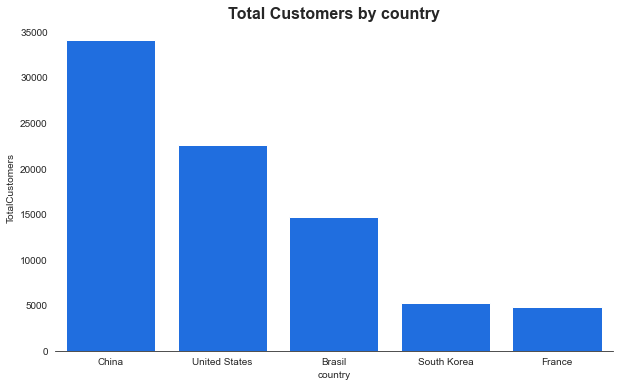

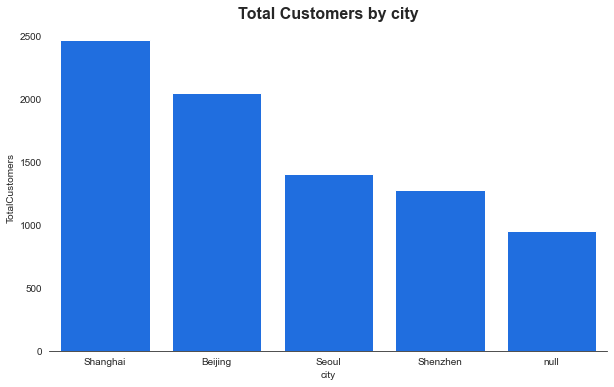

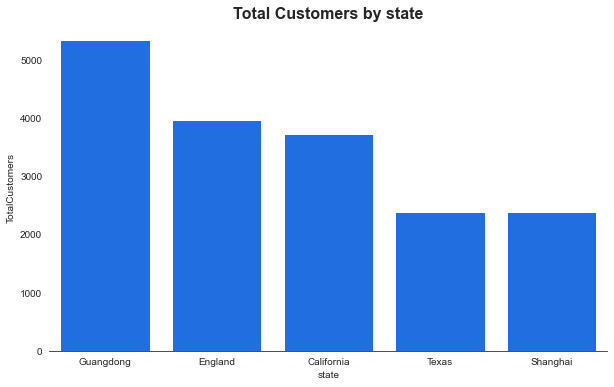

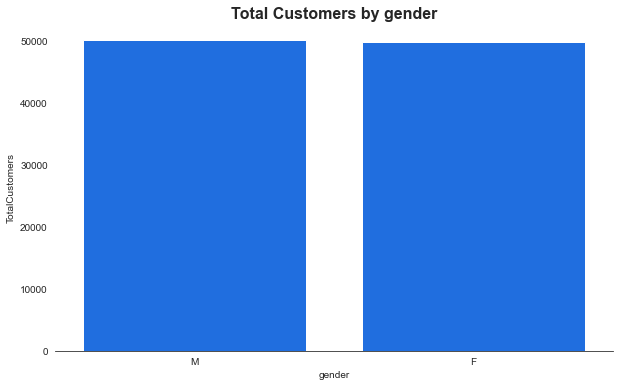

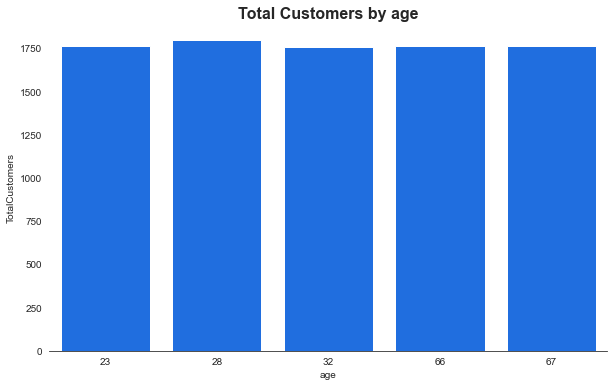

In [259]:
customer_base = ['country', 'city', 'state', 'gender', 'age']

for i in customer_base:
    q = """
    select 
        {},
        count(*) as num_customers
    from bigquery-public-data.thelook_ecommerce.users
    group by {}

    order by num_customers desc
    limit 5
    """.format(i,i)

    df = pd.read_gbq(q)
    sns.barplot(x=i, y='num_customers', data=df, color='#0068ff')
    plt.title('Total Customers by {}'.format(i))
    plt.xlabel(i)
    plt.ylabel('TotalCustomers')
    plt.show()


## Inventorylevels

## What are the most popular products among customers and how has their popularity changed over time?

In [ ]:
# See how many products they sell
q = """
select count(distinct name) as num_products
from bigquery-public-data.thelook_ecommerce.products;
"""
pd.read_gbq(q)

,num_products
0,27309


In [ ]:
# Top 10 products
q = """
select
    name,
    count(*) as total_ordered

from bigquery-public-data.thelook_ecommerce.order_items as o
join bigquery-public-data.thelook_ecommerce.products as p
on o.product_id = p.id

group by name
order by count(*) desc
limit 10
"""
pd.read_gbq(q)

,name,total_ordered
0,Wrangler Men's Premium Performance Cowboy Cut ...,56
1,Joe's Jeans Men's Rebel Relaxed Fit Jean,35
2,Volcom Men's Vorta Slim Straight Leg Fit Jean,34
3,Wrangler Men's Original Cowboy Cut Relaxed Fit...,34
4,True Religion Men's Ricky Straight Jean,33
5,Puma Men's Socks,33
6,7 For All Mankind Men's Standard Classic Strai...,32
7,Rusty Men's Goombah Too Boardshort,32
8,Wrangler Men's Genuine Tampa Cargo Short,31
9,Wrangler Men's Wrancher Dress Jean,31


In [ ]:
# Top 10 products
q = """
select
    date(created_at) as date_order_created,
    category,
    name,
    brand

from bigquery-public-data.thelook_ecommerce.order_items as o
join bigquery-public-data.thelook_ecommerce.products as p
on o.product_id = p.id

where name in (
    select
        name

    from bigquery-public-data.thelook_ecommerce.order_items as o
    join bigquery-public-data.thelook_ecommerce.products as p
    on o.product_id = p.id

    group by name
    order by count(*) desc
    limit 10)

order by created_at
"""
df = pd.read_gbq(q)
df

,date_order_created,category,name,brand
0,2019-02-21,Jeans,7 For All Mankind Men's Standard Classic Strai...,7 For All Mankind
1,2019-03-07,Swim,Rusty Men's Goombah Too Boardshort,Rusty
2,2019-06-01,Swim,Rusty Men's Goombah Too Boardshort,Rusty
3,2019-06-06,Jeans,Volcom Men's Vorta Slim Straight Leg Fit Jean,Volcom
4,2019-07-13,Jeans,Volcom Men's Vorta Slim Straight Leg Fit Jean,Volcom
...,...,...,...,...
346,2023-02-10,Shorts,Wrangler Men's Genuine Tampa Cargo Short,Wrangler
347,2023-02-10,Socks,Puma Men's Socks,PUMA
348,2023-02-11,Jeans,Wrangler Men's Original Cowboy Cut Relaxed Fit...,Wrangler
349,2023-02-11,Jeans,Joe's Jeans Men's Rebel Relaxed Fit Jean,Joe's Jeans


## Others
* top 10 users based off total spend
* top 10 countries by spend

* CREATE profit margin table
* profit margin by country, product, brand, etc
* 
* 

* amount spend by country
* orders by state
* traffic source: source of web traffc breakdown
* distinct users by country
* bottom 5 products
* top 5 products
* profit by category
* profit over time
* average shipping time by distribution
* total completed orders
* totla inventory
* completed orders over time by center

# How to create value for the business
After gaining an understanding of the data contained in each table, I have identified several business questions and tasks to help create value for the business.


1. By analysing the KPIs and conducting hypothesis tests, the e-commerce business could determine which factors are driving the success of the business and make adjustments to improve them. For example, if the results of the hypothesis tests show that there is a significant difference between the conversion rates of different age groups, the e-commerce business could create targeted marketing campaigns for each age group to increase conversions.

2. KMeans clustering to segment customers into different groups can help the e-commerce business understand which customer segments are the most profitable and which segments need more attention. This information can then be used to allocate resources more efficiently and improve the overall success of the business.

# Data cleaning, transformation
After scraping the data, I needed to clean it up so that it was usable for our model. 
1. Create copy/views of tables so can clean data

* identfy and remove duplicates
* similar words DIFF()
* consistent formating,data types
* missing values
* consistent field length LENGTH()
* TRIM() unwanted spaces
* spelling errors with REGEX_REPLACE(lower(trim(column_name)), '[^a-zA-Z0-9]+', '')
* date format

I made the following changes:
* Parsed numeric data out of salary
* Made columns for employer provided salary and hourly wages
* Removed rows without salary
* Parsed rating out of company text

Created the following variables:
* Made a new column for company state
* Added a column for if the job was at the company’s headquarters
* Transformed founded date into age of company


create function
cleanse_string (text string)
returns string
as (regex_replace(lower(trim(text)), '[^a-zA-Z0-9]+', '')

# Data Model
* import views into powerbi
* create data model, relationshipd
* power query to validate data (correct datatypes, data view missings,etc)
* final clean,transform data
* screenshot of ETD

# EDA
* SQL analyse data and answer questions, discover insights
* Calculate measures, KPIs -> validate with PowerBI DAX

# Univariate Analysis
I looked at the distributions of the data and the value counts for the various categorical variables. Below are a few highlights from the pivot tables.
* missing values, min, max, mean, median, std, skew, kurtosis
* iqr to detect outliers
* distribution plots
* Prepare data for statistical analysis: remove outliers, missing values

# Bivariate Analysis
* statistics summary,
* +/-, effect, test, p-value
* heteroscedascity, skew, kurtosis
* plots


# t-tests

* I tested statistics from the first three quarters, if they´re significant different from the 4th quarter:
* Reject H0 at the 95% confidence interval for Pace, AST, 3P%,'PTS','FT%
* Can´t reject H0 for DEFRTG and OFFRTG at the 95% confidence interval

# KMeans Clustering
I wanted to know the individual team performance, if some teams step up in the 4th quarter:

The actual top 3 in the standings (Bucks, Lakers, Clippers) grouped in the same cluster + the contenders in the west (Thunder, Mavericks)
Also, the bottom teams were all grouped in one cluster
The other two grouped was teams, who are in the middle or don´t improve much in the 4th quarter to be in the elite cluster

# Conclusion
I couldn´t prove, that the defense improved in the last quarter of the game. The lower scoring average in the 4th is a result of less possessions. Still they´re some teams, who play better in the 4th quarter and it is not a coincidence that this are the top ranked teams of the league. Because of that my claim would be, that the best teams have an on-switch and can play their best, when it matters.
* key insights, patterns
* summarise key drivers of KPIs
* plot
* make recommendations to monitor these key drivers


# Dashboard
In this step, I built a flask API endpoint that was hosted on a local webserver by following along with the TDS tutorial in the reference section above. The API endpoint takes in a request with a list of values from a job listing and returns an estimated salary.